## imports

In [1]:
import argparse
import os
import pickle
import icelakes
from subprocess import call
from icelakes.utilities import encedc, decedc
from icelakes.nsidc import download_granule, edc
from icelakes.detection import read_atl03, detect_lakes, melt_lake

parser = argparse.ArgumentParser(description='Test script to print some stats for a given ICESat-2 ATL03 granule.')
parser.add_argument('--granule', type=str, default='ATL03_20210715182907_03381203_005_01.h5',
                    help='The producer_id of the input ATL03 granule')
parser.add_argument('--polygon', type=str, default='geojsons/jakobshavn_small.geojson',
                    help='The file path of a geojson file for spatial subsetting')
parser.add_argument('--is2_data_dir', type=str, default='IS2data',
                    help='The directory into which to download ICESat-2 granules')
parser.add_argument('--download_gtxs', type=str, default='all',
                    help='String value or list of gtx names to download, also accepts "all"')
parser.add_argument('--out_data_dir', type=str, default='detection_out_data',
                    help='The directory to which to write the output data')
parser.add_argument('--out_plot_dir', type=str, default='detection_out_plot',
                    help='The directory to which to write the output plots')
parser.add_argument('--out_stat_dir', type=str, default='detection_out_stat',
                    help='The directory to which to write the granule stats')

# set arguments as class for now, to run in jupyter
if parser.prog == 'ipykernel_launcher.py':
    class Args:
        granule = 'ATL03_20210715182907_03381203_005_01.h5'
        polygon = 'geojsons/jakobshavn_small.geojson'
        is2_data_dir =  'IS2data'
        download_gtxs = 'all'
        out_data_dir = 'detection_out_data'
        out_plot_dir = 'detection_out_plot'
        out_stat_dir = 'detection_out_stat'
    args=Args()
else:
    args = parser.parse_args()
    
# try to figure out where the script is being executed (just to show those maps at conferences, etc...)
try:
    with open('location-wrapper.sh', 'rb') as file:
        script = file.read()
    rc = call(script, shell=True)
except:
    print('\nUnable to determine compute location for this script.\n')

# shuffling files around for HTCondor
for thispath in (args.is2_data_dir, args.out_data_dir, args.out_plot_dir):
    if not os.path.exists(thispath): os.makedirs(thispath)

# download the specified ICESat-2 data from NSIDC
input_filename = args.is2_data_dir + '/processed_' + args.granule

In [ ]:
input_filename = download_granule(args.granule, args.download_gtxs, args.polygon, args.is2_data_dir, decedc(edc().u), decedc(edc().p))

In [2]:
gtx_list, ancillary = read_atl03(input_filename, gtxs_to_read='none')

# detect melt lakes
lake_list = []
granule_stats = {'length_total': 0.0, 'length_lakes': 0.0, 'n_photons_total': 0, 'n_photons_lakes': 0}
for gtx in gtx_list:
    lakes_found, gtx_stats = detect_lakes(input_filename, gtx, args.polygon, verbose=False)
    for k in granule_stats.keys(): granule_stats[k] += gtx_stats[k]
    lake_list += lakes_found

# print stats for granule
print('\nGRANULE STATS (length total, length lakes, photons total, photons lakes):%.3f,%.3f,%i,%i' % tuple(granule_stats.values()))

# save plots and lake data dictionaries
for lake in lake_list:
    filename_base = 'lake_%05i_%s_%s_%s_%s_%s' % ((1.0-lake.detection_quality)*10000, lake.ice_sheet, lake.melt_season, 
                                                  lake.polygon_name, lake.granule_id[:-4], lake.gtx)
    # plot each lake and save to image
    fig = lake.plot_detected(min_width=0.0, min_depth=0.0);
    figname = args.out_plot_dir + '/%s.jpg' % filename_base
    if fig is not None: fig.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0)
    
    # export each lake to pickle (TODO: add .h5 option soon)
    pklname = args.out_data_dir + '/%s.pkl' % filename_base
    with open(pklname, 'wb') as f: pickle.dump(vars(lake), f)

lk = lake_list[0]
statsfname = args.out_stat_dir + '/stats_%s_%s_%s_%s.csv' % (lk.ice_sheet, lk.melt_season, lk.polygon_name, lk.granule_id[:-4])
with open('filename.txt', 'w') as f: print('%.3f,%.3f,%i,%i' % tuple(granule_stats.values()), file=f)

print('\n----------->   SUCCESS!   <-----------')

  reading in IS2data/processed_ATL03_20210715182907_03381203_005_01.h5
  reading in beam:  --> done.
  reading in IS2data/processed_ATL03_20210715182907_03381203_005_01.h5
  reading in beam: gt1l  --> done.

-----------------------------------------------------------------------------

PROCESSING GROUND TRACK: gt1l (weak)
---> finding flat surfaces in photon data (15 / 666 were flat)
---> calculating photon densities & looking for second density peaks below the surface
(5 / 666 pass lake quality test)
---> merging major frame segments that possibly represent lakes iteratively
   --> iteration   0, number of lakes:    5
   --> iteration   1, number of lakes:    3
   --> iteration   2, number of lakes:    2
---> checking lake edges and extending them if the surface elevation matches
extending lake  0:<> 1:<> 
---> calculating remaining photon densities
---> calculating photon densities & looking for second density peaks below the surface
(5 / 666 pass lake quality test)
RESULTS FOR : GT1

In [ ]:
import argparse
import icelakes
from icelakes.utilities import encedc, decedc
from icelakes.nsidc import download_granule, edc
from icelakes.detection import read_atl03, detect_lakes, melt_lake

## parsing arguments from command line

In [ ]:
parser = argparse.ArgumentParser(description='Test script to print some stats for a given ICESat-2 ATL03 granule.')
parser.add_argument('--granule', type=str, default='ATL03_20210715182907_03381203_005_01.h5',
                    help='The producer_id of the input ATL03 granule')
parser.add_argument('--polygon', type=str, default='geojsons/jakobshavn_small.geojson',
                    help='The file path of a geojson file for spatial subsetting')
parser.add_argument('--IS2datadir', type=str, default='IS2data',
                    help='The directory into which to download ICESat-2 granules')
parser.add_argument('--download_gtxs', type=str, default='all',
                    help='String value or list of gtx names to download, also accepts "all"')

# set arguments as class for now, to run in jupyter
if parser.prog == 'ipykernel_launcher.py':
    class Args:
        granule = 'ATL03_20210715182907_03381203_005_01.h5'
        polygon = 'geojsons/jakobshavn_test.geojson'
        IS2datadir =  'IS2data'
        download_gtxs = 'all'
    args=Args()
else:
    args = parser.parse_args()

In [ ]:
# args.granule = 'ATL03_20200116042313_03120610_005_01.h5'
# args.granule = 'ATL03_20200116171056_03200612_005_01.h5'
# args.polygon = 'geojsons/nivlisen_test.geojson'

# args.granule = 'ATL03_20200204085006_06050610_005_01.h5'
# args.granule = 'ATL03_20191229231828_00490612_005_01.h5'	
# args.granule = 'ATL03_20191229103045_00410610_005_01.h5'
# args.granule = 'ATL03_20200131214610_05520612_005_01.h5'
# args.granule = 'ATL03_20200131085827_05440610_005_01.h5'
# args.granule = 'ATL03_20200127090648_04830610_005_01.h5'
# args.granule = 'ATL03_20200127215431_04910612_005_01.h5'
# args.granule = 'ATL03_20200102102224_01020610_005_01.h5'
# args.granule = 'ATL03_20200102231007_01100612_005_01.h5'
# args.granule = 'ATL03_20220224205325_09861410_005_01.h5'
# args.granule = 'ATL03_20200204213749_06130612_005_01.h5'
# args.polygon = 'geojsons/georgeVI_test.geojson'

args.granule = 'ATL03_20190102184312_00810210_005_01.h5'
# # args.granule = 'ATL03_20190103073055_00890212_005_01.h5'
args.polygon = 'geojsons/amery_test.geojson'
# args.polygon = 'geojsons/amery_1lake_test.geojson'

# args.granule = 'ATL03_20210715182907_03381203_005_01.h5'
# args.granule = 'ATL03_20210809171331_07191203_005_01.h5'
# args.granule = 'ATL03_20210802061504_06051205_005_01.h5'
# args.polygon = 'geojsons/jakobshavn_test.geojson'

args.granule = 'ATL03_20190822144852_08480405_005_01.h5'
# args.granule = 'ATL03_20210831140621_10531203_005_01.h5'
args.polygon = 'geojsons/79N_test.geojson'

# args.granule = 'ATL03_20200224204246_09180610_005_01.h5'
# args.polygon = 'geojsons/shackleton_test.geojson'

############################################################
# args.granule = 'ATL03_20210822035912_09091205_005_01.h5'
# args.polygon = 'geojsons/GrIS-NE-1lake-test.geojson'
# args.polygon = 'geojsons/GrIS-NE-test.geojson'

# args.granule = 'ATL03_20200116042313_03120610_005_01.h5'
# args.granule = 'ATL03_20200116171056_03200612_005_01.h5'
# args.polygon = 'geojsons/nivlisen_test.geojson'

## download data from NSIDC

In [ ]:
%%time
# input_filename = download_granule(args.granule, args.download_gtxs, args.polygon, args.IS2datadir, decedc(edc().u), decedc(edc().p))
# just to not have to re-download nsidc data while testing
input_filename = args.IS2datadir + '/' + 'processed_' + args.granule
# print(input_filename)

## read in the data

In [ ]:
%%time
photon_data, bckgrd_data, ancillary = read_atl03(input_filename, geoid_h=True)
gtx_list = list(photon_data.keys())
lake_list = []
for gtx in gtx_list:
    lake_list += detect_lakes(photon_data, gtx, ancillary, args.polygon, verbose=False)

In [ ]:
# vars(lake)

In [ ]:
len('ATL03_20190822144852_08480405_005_01.h5')

In [7]:
fn = 'detection_out_data/lake_02995_GrIS_2021_jakobshavn_test_ATL03_20210729062325_05441205_005_0_gt2r.pkl'
class dictobj:
    def __init__(self, in_dict:dict):
        assert isinstance(in_dict, dict)
        for key, val in in_dict.items():
            setattr(self, key, val)
with open(fn, 'rb') as f:
    lk_dict = pickle.load(f)
    lk = dictobj(lk_dict)

In [25]:
vars(lk)

{'mframe_start': 1631732679,
 'mframe_end': 1631732697,
 'main_peak': 1631.6291209218161,
 'n_subsegs_per_mframe': 10,
 'granule_id': 'ATL03_20210729062325_05441205_005_01.h5',
 'rgt': 544,
 'gtx': 'gt2r',
 'polygon_filename': 'geojsons/jakobshavn_test.geojson',
 'polygon_name': 'jakobshavn_test',
 'beam_number': 3,
 'beam_strength': 'strong',
 'cycle_number': 12,
 'sc_orient': 'forward',
 'dead_time': 2.9812500000000002e-09,
 'dead_time_meters': 0.44687813270625004,
 'photon_data':              lat        lon            h            dt      mframe  \
 0      65.448743 -48.560954  1633.769203  1.127752e+08  1631732679   
 1      65.448743 -48.560954  1633.775429  1.127752e+08  1631732679   
 2      65.448736 -48.560955  1632.971475  1.127752e+08  1631732679   
 3      65.448736 -48.560955  1633.842568  1.127752e+08  1631732679   
 4      65.448736 -48.560955  1633.913491  1.127752e+08  1631732679   
 ...          ...        ...          ...           ...         ...   
 24340  65.42468

In [41]:
import h5py

def write_to_hdf5(self, filename):
    
    with h5py.File(filename, 'w') as f:
        
        comp="gzip"
        phdat = f.create_group('photon_data')
        phdat.create_dataset('lon', data=self.photon_data.lon, dtype='f8', compression=comp)
        phdat.create_dataset('lat', data=self.photon_data.lat, dtype='f8', compression=comp)
        phdat.create_dataset('xatc', data=self.photon_data.xatc, dtype='f8', compression=comp)
        phdat.create_dataset('h', data=self.photon_data.h, dtype='f8', compression=comp)
        phdat.create_dataset('geoid', data=self.photon_data.geoid, dtype='f8', compression=comp)
        phdat.create_dataset('snr', data=self.photon_data.snr, dtype='f8', compression=comp)
        phdat.create_dataset('mframe', data=self.photon_data.mframe, dtype='uint32', compression=comp)
        phdat.create_dataset('ph_id_pulse', data=self.photon_data.ph_id_pulse, dtype='uint8', compression=comp)
        
        mfdat = f.create_group('mframe_data')
        mfdat.create_dataset('mframe', data=self.mframe_data.index, dtype='uint32', compression=comp)
        mfdat.create_dataset('lon', data=self.mframe_data.lon, dtype='f8', compression=comp)
        mfdat.create_dataset('lat', data=self.mframe_data.lat, dtype='f8', compression=comp)
        mfdat.create_dataset('xatc', data=self.mframe_data.xatc, dtype='f8', compression=comp)
        mfdat.create_dataset('dt', data=self.mframe_data.dt, dtype='f8', compression=comp)
        mfdat.create_dataset('xatc_min', data=self.mframe_data.xatc_min, dtype='f8', compression=comp)
        mfdat.create_dataset('xatc_max', data=self.mframe_data.xatc_max, dtype='f8', compression=comp)
        mfdat.create_dataset('n_phot', data=self.mframe_data.n_phot, dtype='uint32', compression=comp)
        mfdat.create_dataset('peak', data=self.mframe_data.peak, dtype='uint32', compression=comp)
        mfdat.create_dataset('is_flat', data=self.mframe_data.is_flat, dtype='bool_', compression=comp)
        mfdat.create_dataset('lake_qual_pass', data=self.mframe_data.lake_qual_pass, dtype='bool_', compression=comp)
        mfdat.create_dataset('quality_summary', data=self.mframe_data.quality_summary, dtype='bool_', compression=comp)
        mfdat.create_dataset('snr_surf', data=self.mframe_data.snr_surf, dtype='f8', compression=comp)
        mfdat.create_dataset('snr_upper', data=self.mframe_data.snr_upper, dtype='f8', compression=comp)
        mfdat.create_dataset('snr_lower', data=self.mframe_data.snr_lower, dtype='f8', compression=comp)
        mfdat.create_dataset('snr_allabove', data=self.mframe_data.snr_allabove, dtype='f8', compression=comp)
        mfdat.create_dataset('ratio_2nd_returns', data=self.mframe_data.ratio_2nd_returns, dtype='f8', compression=comp)
        mfdat.create_dataset('quality_secondreturns', data=self.mframe_data.quality_secondreturns, dtype='f8', compression=comp)
        mfdat.create_dataset('alignment_penalty', data=self.mframe_data.alignment_penalty, dtype='f8', compression=comp)
        mfdat.create_dataset('range_penalty', data=self.mframe_data.range_penalty, dtype='f8', compression=comp)
        mfdat.create_dataset('length_penalty', data=self.mframe_data.length_penalty, dtype='f8', compression=comp)
        
        scnds = f.create_group('detection_2nd_returns')
        scnds.create_dataset('h', data=self.detection_2nd_returns['h'], dtype='f8', compression=comp)
        scnds.create_dataset('xatc', data=self.detection_2nd_returns['xatc'], dtype='f8', compression=comp)
        scnds.create_dataset('prom', data=self.detection_2nd_returns['prom'], dtype='f8', compression=comp)
        
        dqinf = f.create_group('detection_quality_info')
        for k in self.detection_quality_info.keys():
            dqinf.create_dataset(k, data=self.detection_quality_info[k], dtype='f8')
        
        props = f.create_group('properties')
        props.create_dataset('mframe_start', data=self.mframe_start, dtype='uint32')
        props.create_dataset('mframe_end', data=self.mframe_end, dtype='uint32')
        props.create_dataset('main_peak', data=self.main_peak, dtype='f8')
        props.create_dataset('n_subsegs_per_mframe', data=self.n_subsegs_per_mframe, dtype='uint8')
        props.create_dataset('len_subsegs', data=self.len_subsegs, dtype='f8')
        props.create_dataset('surface_extent_detection', data=[x for y in self.surface_extent_detection for x in y], dtype='f8')
        props.create_dataset('lat_surface_extent_detection', data=[x for y in self.lat_surface_extent_detection for x in y], dtype='f8')
        props.create_dataset('length_extent', data=self.length_extent, dtype='f8')
        props.create_dataset('full_lat_extent_detection', data=self.full_lat_extent_detection, dtype='f8')
        props.create_dataset('lat_min', data=self.lat_min, dtype='f8')
        props.create_dataset('lat_max', data=self.lat_max, dtype='f8')
        props.create_dataset('lat', data=self.lat, dtype='f8')
        props.create_dataset('lat_str', data=self.lat_str)
        props.create_dataset('lon_min', data=self.lon_min, dtype='f8')
        props.create_dataset('lon_max', data=self.lon_max, dtype='f8')
        props.create_dataset('lon', data=self.lon, dtype='f8')
        props.create_dataset('lon_str', data=self.lon_str)
        props.create_dataset('beam_number', data=self.beam_number, dtype='uint8')
        props.create_dataset('beam_strength', data=self.beam_strength)
        props.create_dataset('cycle_number', data=self.cycle_number, dtype='uint8')
        props.create_dataset('sc_orient', data=self.sc_orient)
        props.create_dataset('dead_time', data=self.dead_time, dtype='f8')
        props.create_dataset('dead_time_meters', data=self.dead_time_meters, dtype='f8')
        props.create_dataset('polygon_filename', data=self.polygon_filename)
        props.create_dataset('polygon_name', data=self.polygon_name)
        props.create_dataset('length_water_surfaces', data=self.length_water_surfaces, dtype='f8')
        props.create_dataset('n_photons_where_water', data=self.n_photons_where_water, dtype='int32')
        props.create_dataset('detection_quality', data=self.detection_quality, dtype='f8')
        props.create_dataset('surface_elevation', data=self.surface_elevation, dtype='f8')
        props.create_dataset('oaurl', data=self.oaurl)
        props.create_dataset('gtx', data=self.gtx)
        props.create_dataset('rgt', data=self.rgt, dtype='uint16')
        props.create_dataset('granule_id', data=self.granule_id, dtype='S39')
        props.create_dataset('melt_season', data=self.melt_season)
        props.create_dataset('ice_sheet', data=self.ice_sheet)
    return

from icelakes.utilities import get_size
mylake = lk

filename = 'data_lakes_detected/lake_example.pkl'
with open(filename, 'wb') as f: pickle.dump(vars(lake), f)
print(get_size(filename))

filename = 'data_lakes_detected/lake_example.h5'
write_to_hdf5(mylake, filename)
print(get_size(filename))

1.32 MB
786.78 KB


In [42]:
import h5py

def descend_obj(obj,sep='\t'):
    """
    Iterate through groups in a HDF5 file and prints the groups and datasets names and datasets attributes
    """
    if type(obj) in [h5py._hl.group.Group,h5py._hl.files.File]:
        for key in obj.keys():
            print(sep,'-',key,':',obj[key])
            descend_obj(obj[key],sep=sep+'\t')
    elif type(obj)==h5py._hl.dataset.Dataset:
        for key in obj.attrs.keys():
            print(sep+'\t','-',key,':',obj.attrs[key])

with h5py.File(filename, 'r') as f:
    descend_obj(f)

	 - detection_2nd_returns : <HDF5 group "/detection_2nd_returns" (3 members)>
		 - h : <HDF5 dataset "h": shape (106,), type "<f8">
		 - prom : <HDF5 dataset "prom": shape (106,), type "<f8">
		 - xatc : <HDF5 dataset "xatc": shape (106,), type "<f8">
	 - detection_quality_info : <HDF5 group "/detection_quality_info" (5 members)>
		 - h_range_2nd_returns : <HDF5 dataset "h_range_2nd_returns": shape (), type "<f8">
		 - lake_depth : <HDF5 dataset "lake_depth": shape (), type "<f8">
		 - lake_length : <HDF5 dataset "lake_length": shape (), type "<f8">
		 - qual_alignment : <HDF5 dataset "qual_alignment": shape (), type "<f8">
		 - strength_2nd_returns : <HDF5 dataset "strength_2nd_returns": shape (), type "<f8">
	 - mframe_data : <HDF5 group "/mframe_data" (21 members)>
		 - alignment_penalty : <HDF5 dataset "alignment_penalty": shape (19,), type "<f8">
		 - dt : <HDF5 dataset "dt": shape (19,), type "<f8">
		 - is_flat : <HDF5 dataset "is_flat": shape (19,), type "|b1">
		 - lake_qual_p

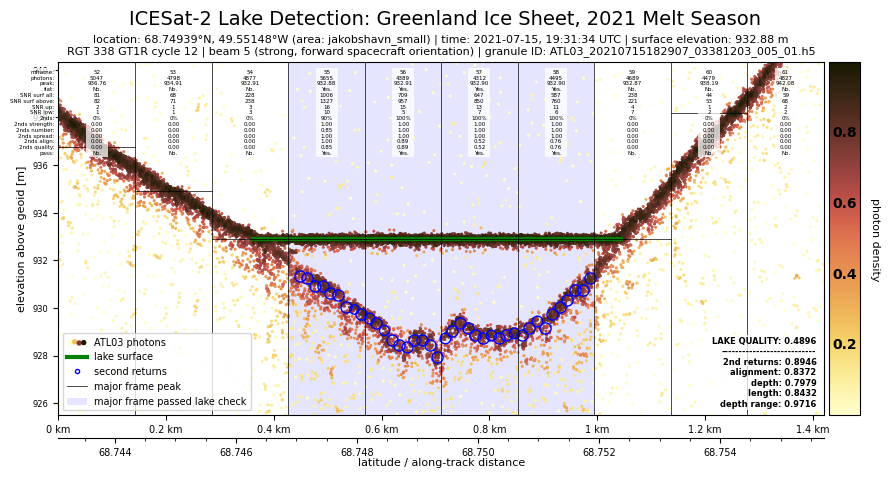

lake number: 9
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2021-07-15&minx=-49.55363483305839&miny=68.74306868826594&maxx=-49.54932690828336&maxy=68.75571831710637&tracks=338&mapType=arctic&beams=5
wrote to file: pklname
_______________________________________________________________________________



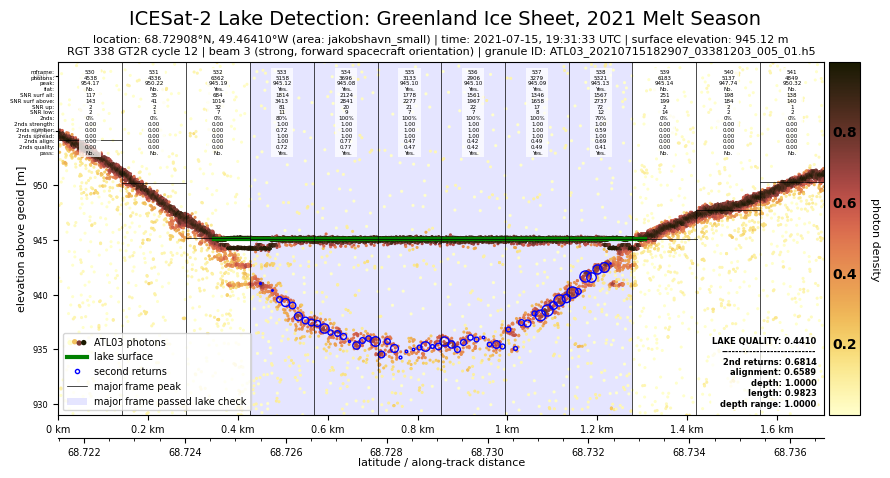

lake number: 9
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2021-07-15&minx=-49.46662166025785&miny=68.72149295328754&maxx=-49.46157696294986&maxy=68.73667089900296&tracks=338&mapType=arctic&beams=3
wrote to file: pklname
_______________________________________________________________________________



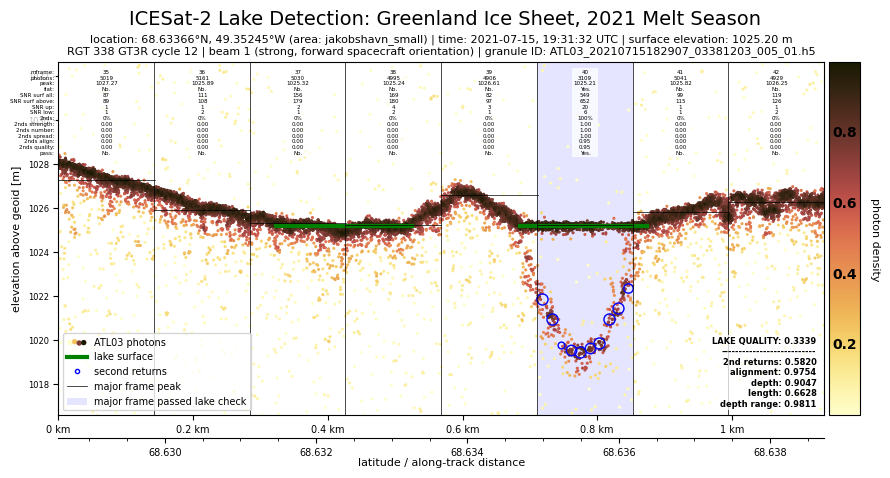

lake number: 9
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2021-07-15&minx=-49.35413277369864&miny=68.62859520617455&maxx=-49.350768875816534&maxy=68.63871179127898&tracks=338&mapType=arctic&beams=1
wrote to file: pklname
_______________________________________________________________________________



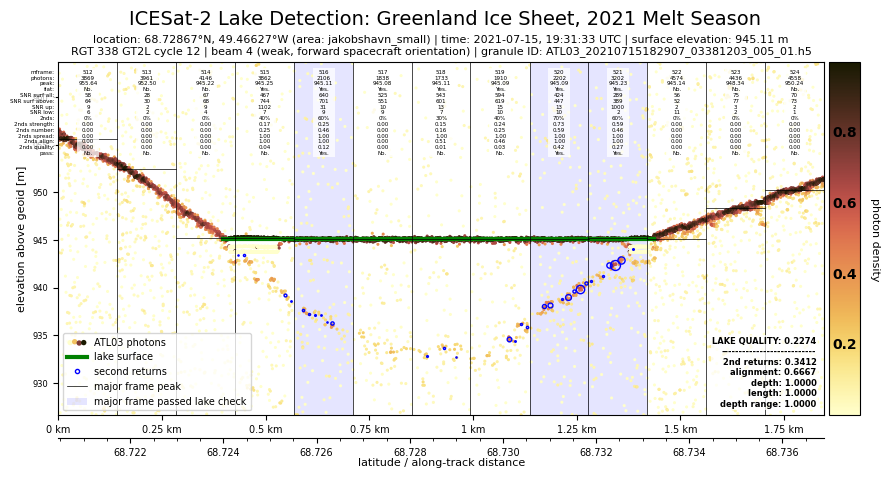

lake number: 9
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2021-07-15&minx=-49.46898968077258&miny=68.7204566378811&maxx=-49.463550905510644&maxy=68.73689339626374&tracks=338&mapType=arctic&beams=4
wrote to file: pklname
_______________________________________________________________________________



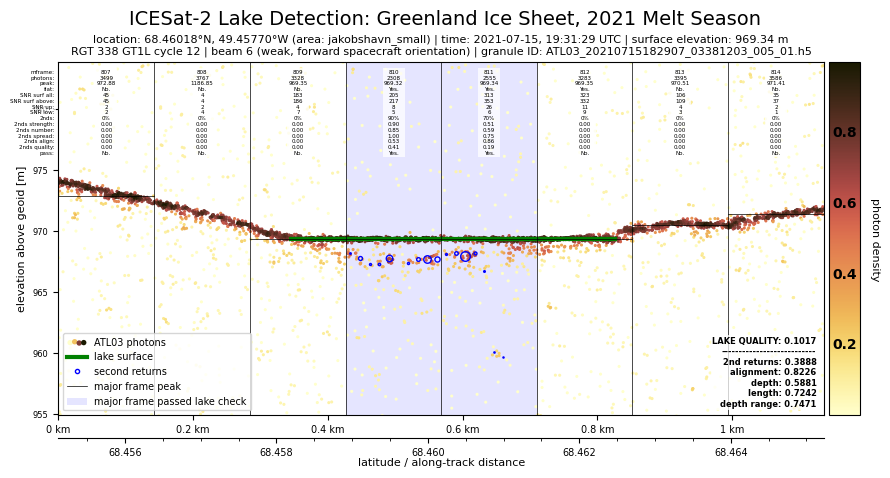

lake number: 9
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2021-07-15&minx=-49.459407916532676&miny=68.45511976954901&maxx=-49.456002877072734&maxy=68.46523260563943&tracks=338&mapType=arctic&beams=6
wrote to file: pklname
_______________________________________________________________________________



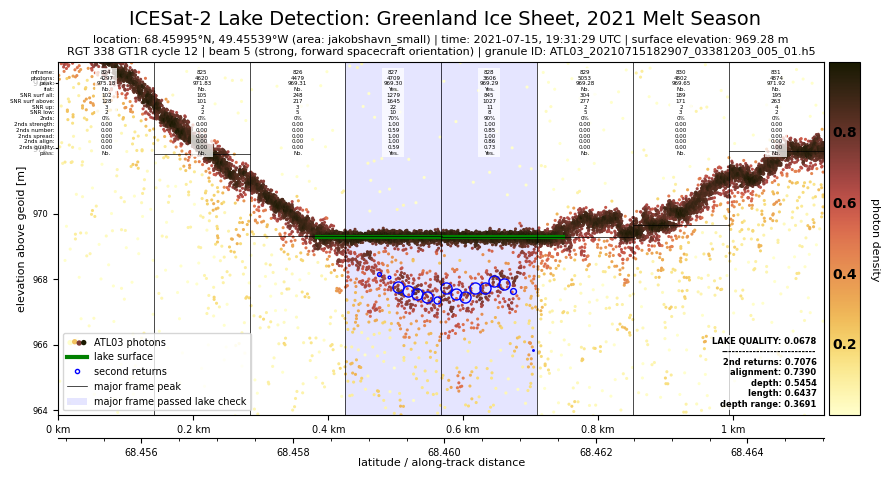

lake number: 9
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2021-07-15&minx=-49.45708015491867&miny=68.45490532476265&maxx=-49.45370292270259&maxy=68.46501166583792&tracks=338&mapType=arctic&beams=5
wrote to file: pklname
_______________________________________________________________________________



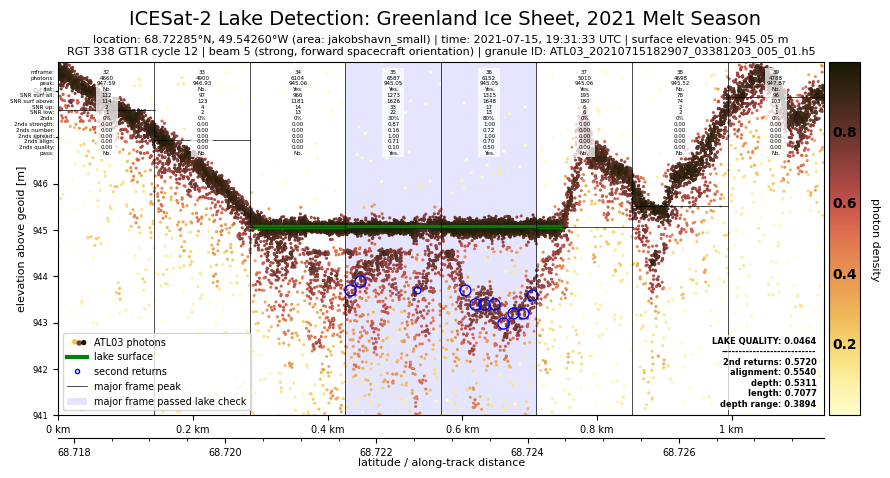

lake number: 9
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2021-07-15&minx=-49.54433233884611&miny=68.7177962762591&maxx=-49.54086163850375&maxy=68.7279209066351&tracks=338&mapType=arctic&beams=5
wrote to file: pklname
_______________________________________________________________________________



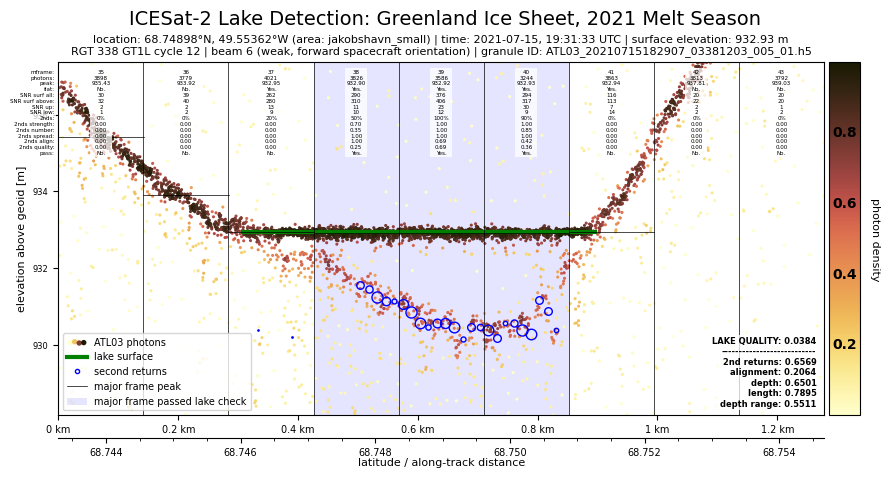

lake number: 9
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2021-07-15&minx=-49.555566449786454&miny=68.74329413478308&maxx=-49.551676814148&maxy=68.7546654120702&tracks=338&mapType=arctic&beams=6
wrote to file: pklname
_______________________________________________________________________________



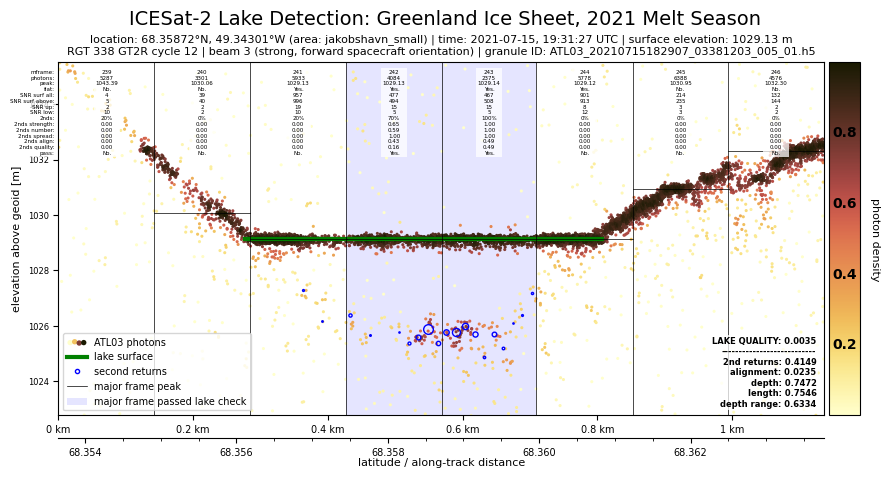

lake number: 9
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2021-07-15&minx=-49.34463619565772&miny=68.35364897056188&maxx=-49.34135419402605&maxy=68.36376416557248&tracks=338&mapType=arctic&beams=3
wrote to file: pklname
_______________________________________________________________________________



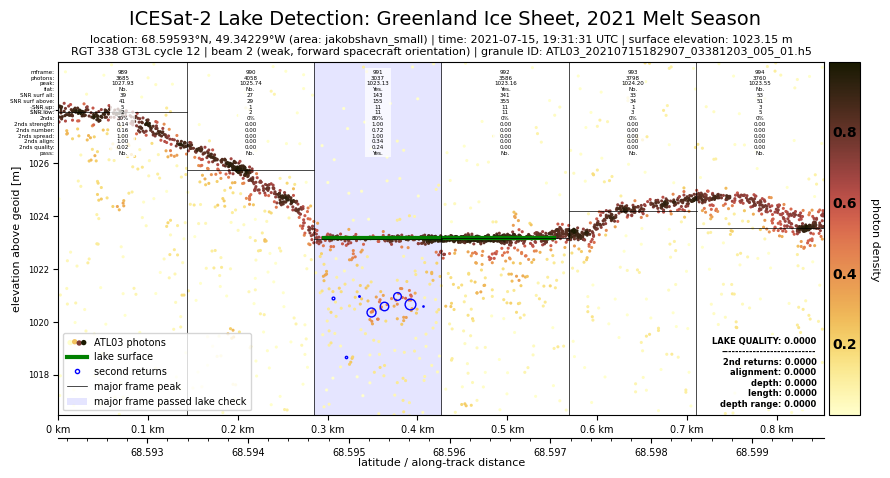

lake number: 9
https://openaltimetry.org/data/icesat2/elevation?product=ATL03&zoom_level=7&tab=photon&date=2021-07-15&minx=-49.3435573039242&miny=68.59211933418204&maxx=-49.341023329475156&maxy=68.59971558586716&tracks=338&mapType=arctic&beams=2
wrote to file: pklname
_______________________________________________________________________________



In [28]:
from IPython.display import Image, display
import pickle
import numpy as np

quality_list = []
for i,lake in enumerate(lake_list):
    quality_list.append(lake.detection_quality)

sort_idxs = np.argsort(1-np.array(quality_list))
lake_list_ordered = [lake_list[i] for i in sort_idxs]

for lake in lake_list_ordered:
    
    fig = lake.plot_detected(min_width=0.0, min_depth=0.0)
    filename_base = 'lake_%05i_%s_%s_%s_%s_%s.jpg' % ((1-lake.detection_quality)*10000, lake.ice_sheet, lake.melt_season, 
                                                          lake.polygon_name, lake.granule_id[:-4], lake.gtx)
    figname = 'figs_quality/%s.jpg' % filename_base
    if fig is not None: fig.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0)
    display(fig)
    
    print('lake number: %i' % i)
    print(lake.oaurl)
    
    pklname = 'pickles/%s.pkl' % filename_base
    with open(pklname, 'wb') as f: pickle.dump(vars(lake), f)
    print('wrote to file: pklname')
    print('_______________________________________________________________________________', end='\n\n')

In [ ]:
import os
import zipfile

for dirtozip in ['figs_quality', 'pickles']:
    filelist = [dirtozip+'/'+f for f in os.listdir(dirtozip) if os.path.isfile(os.path.join(dirtozip+'/', f))]
    ZipFile = zipfile.ZipFile("zip_test_%s.zip"%dirtozip, "w" )
    for file in filelist:
        ZipFile.write(file, compress_type=zipfile.ZIP_DEFLATED)
    ZipFile.close()